# Example of  CostCurves Package
Author: Paulina Morillo, Cèsar Ferri

e-mail: paumoal@inf.upv.es

In [33]:
library("RWeka")
library("caret")
library("CostCurves")

## Data preparation
We start loading some data

In [34]:
data <- read.arff("data/credit-a.arff")
data[seq(10),]


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
1,b,30.83,0,u,g,w,v,1.25,t,t,1,f,g,202,0,+
2,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43,560,+
3,a,24.5,0.5,u,g,q,h,1.5,t,f,0,f,g,280,824,+
4,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,100,3,+
5,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
6,b,32.08,4,u,g,m,v,2.5,t,f,0,t,g,360,0,+
7,b,33.17,1.04,u,g,r,h,6.5,t,f,0,t,g,164,31285,+
8,a,22.92,11.585,u,g,cc,v,0.04,t,f,0,f,g,80,1349,+
9,b,54.42,0.5,y,p,k,h,3.96,t,f,0,f,g,180,314,+
10,b,42.5,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+


In [35]:
# The class is the last parameter
posParamEstudio<-length(data[1,])
nomParamEstudio<-names(data)[posParamEstudio]
# shuffle data
w<-data[sample(nrow(data)),]
tam<-length(data[,1])
# clmin => minority class
clmin<-unique(data[nomParamEstudio])
if(sum(data[,nomParamEstudio]==clmin[[1]][1])>(tam/2)){
mnom=clmin[[1]][1]
} else mnom=clmin[[1]][2]
# we split data into 50% train and 50% test
indiceStrat<-createDataPartition(w[,posParamEstudio], p = 0.5,list=FALSE)
train<-w[indiceStrat,] # train data
test<-w[-indiceStrat,] # test data

## Model construction
Learn a Decision tree model

In [36]:
# ob = > Variable a predecir (Objetivo de aprendizaje)
ob<-paste(nomParamEstudio,"~.",sep="")
# Selección y Entrenamiento del modelo (Modelo J48)
model<- J48(ob, data = train, control = Weka_control(U = TRUE,A=TRUE))
summary(model)


=== Summary ===

Correctly Classified Instances         312               95.122  %
Incorrectly Classified Instances        16                4.878  %
Kappa statistic                          0.9018
Mean absolute error                      0.137 
Root mean squared error                  0.2105
Relative absolute error                 27.5951 %
Root relative squared error             42.2491 %
Total Number of Instances              328     

=== Confusion Matrix ===

   a   b   <-- classified as
 143   7 |   a = +
   9 169 |   b = -

We extract probabilities and classes from the models

In [37]:
# probabilities and classes from train data
allprobstrain<-predict(model, newdata = train,type=c("probability"))
probstrain<-allprobstrain[,mnom]
cltrain<-c()
for (i in 1:length(train[,1]))
{
if(train[i,nomParamEstudio]==mnom) {cltrain[i]<-1 }
else cltrain[i]<-0
}

# (predictions: cltrain => classes, probtrain => probabilities)
inptrain<-cbind(cltrain,probstrain)
predicciones_entrenamiento <-inptrain[order(inptrain[,2],inptrain[,1]),]
probs_train<-t(inptrain[,2])
class_train<-t(inptrain[,1])

# probabilities and classes from test data
allprobs<-predict(model, newdata = test,type=c("probability"))
probstest<-allprobs[,mnom]
cltest<-c()
for (i in 1:length(test[,1]))
{
if(test[i,posParamEstudio]==mnom) {cltest[i]<-1 }
else cltest[i]<-0
}
    
inp<-cbind(cltest,probstest)
predicciones_prueba<-inp[order(inp[,2],inp[,1]),]
probs_test<-t(inp[,2])
class_test<-t(inp[,1])

## Visualisation of results

### Roc Curves: Train vs Test

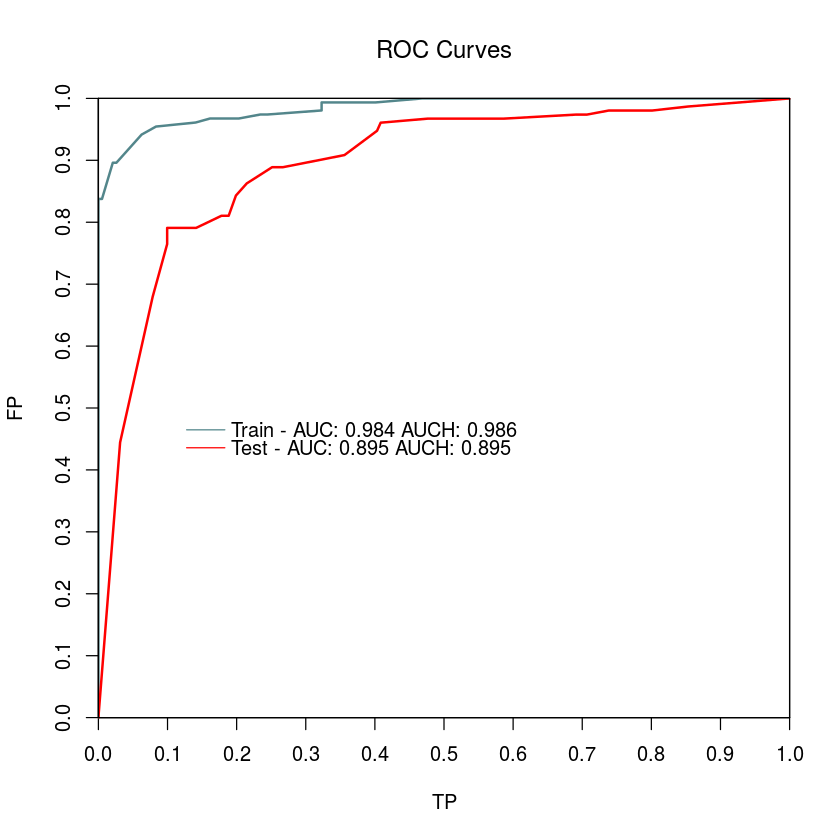

In [38]:
#  ROC curves
R <- RocCurves(list(probs_train, probs_test), list(class_train, class_test),
plotCH = FALSE, main = "ROC Curves", xlab = "TP", ylab = "FP",
namesClassifiers = c("Train - ","Test - "),
xPosLegend = 0.1, yPosLegend = 0.5, cexL = 1)

### Cost Lines: Train vs Test

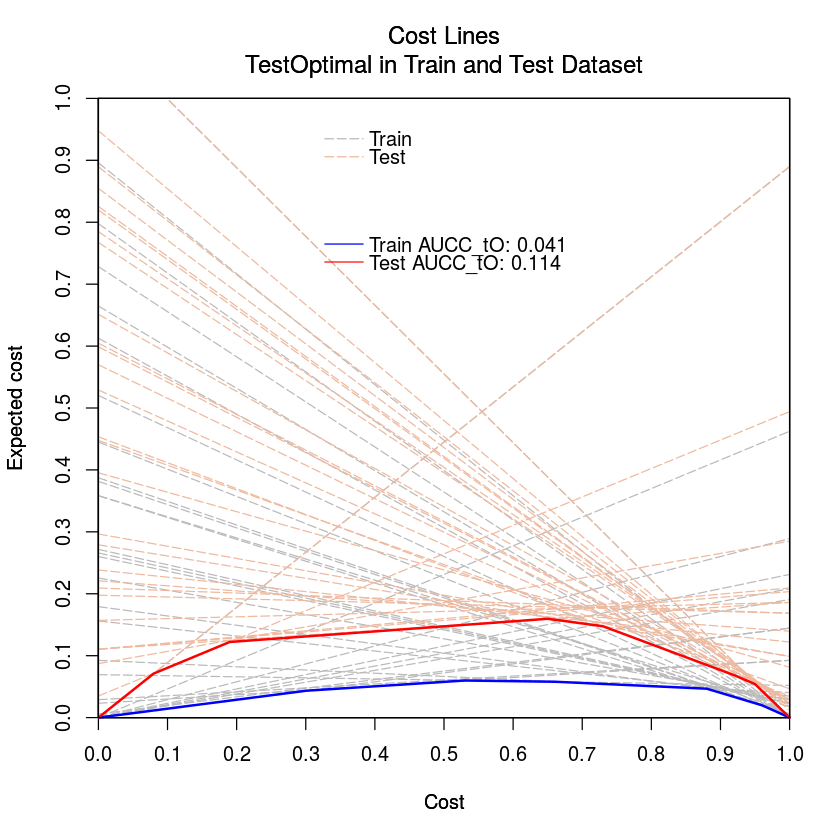

In [39]:
# Cost Lines: Test and Train
#Parameter Hold for mixing plots
R <- CostLines(list(probs_train, probs_test), list(class_train, class_test),
main = "Cost Lines\n TestOptimal in Train and Test Dataset ", xlab = "Cost",
ylab = "Expected cost", lwd=1,
namesClassifiers = c("Train","Test"), cexL=1, xPosLegend = 0.3)
R <- TestOptimal(list(probs_train, probs_test), list(class_train, class_test),
main = NULL, xlab = NULL,
ylab = NULL, namesClassifiers = c("Train","Test"), cexL=1,
xPosLegend = 0.3, yPosLegend = 0.8, hold = TRUE)

### Cost Lines: Train optimal vs Test Optimal

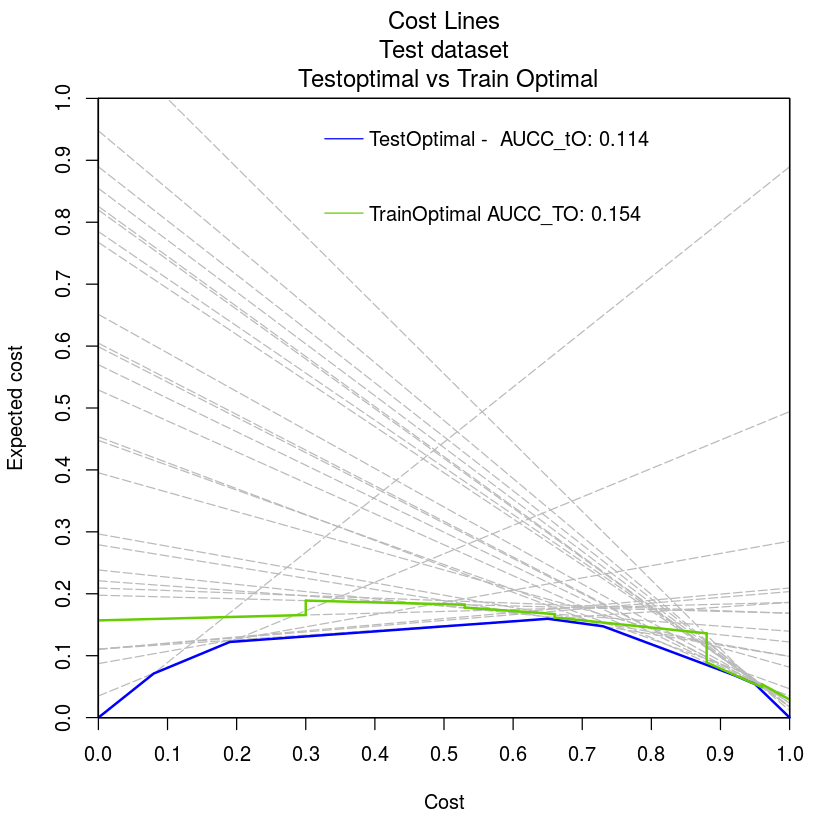

In [40]:
# Train Optimal
R <- CostLines(list(probs_test), list(class_test),
main = "Cost Lines\n Test dataset \n Testoptimal vs Train Optimal", xlab = "Cost",
ylab = "Expected cost", legendOFF = TRUE, lwd=1)
R <- TestOptimal(list(probs_test), list(class_test), main = NULL, xlab = NULL,
ylab = NULL, hold = TRUE, namesClassifiers = "TestOptimal - ",
cexL = 1, xPosLegend = 0.3)

R <- TrainOptimal(list(probs_train), list(class_train), list(probs_test),
list(class_test), namesClassifiers = "TrainOptimal", cexL = 1,
xPosLegend = 0.3, yPosLegend = 0.85, hold = TRUE, main = NULL,
xlab = NULL, ylab = NULL)

### Cost Curves: Brier Curves

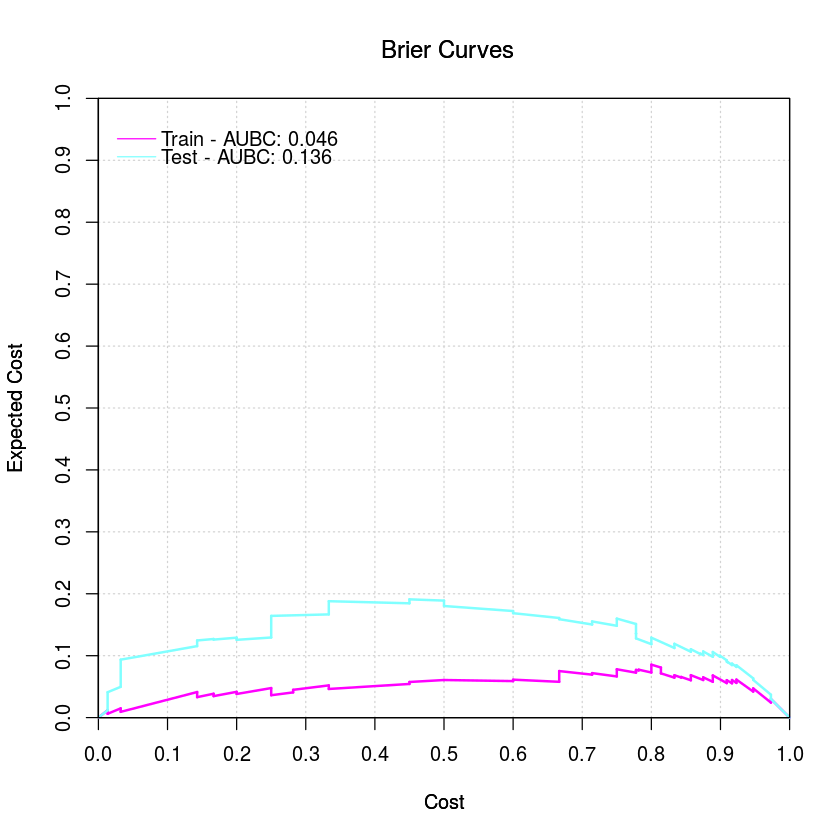

In [41]:

R <- BrierCurves(list(probs_train, probs_test), list(class_train, class_test),
main = " Brier Curves", xlab = "Cost", cexL=1,
xPosLegend = 0,ylab = "Expected Cost",
namesClassifiers = c("Train -", "Test -"),
gridOFF = FALSE)



### Cost Curves: Rate driven curves and Kendall Curves

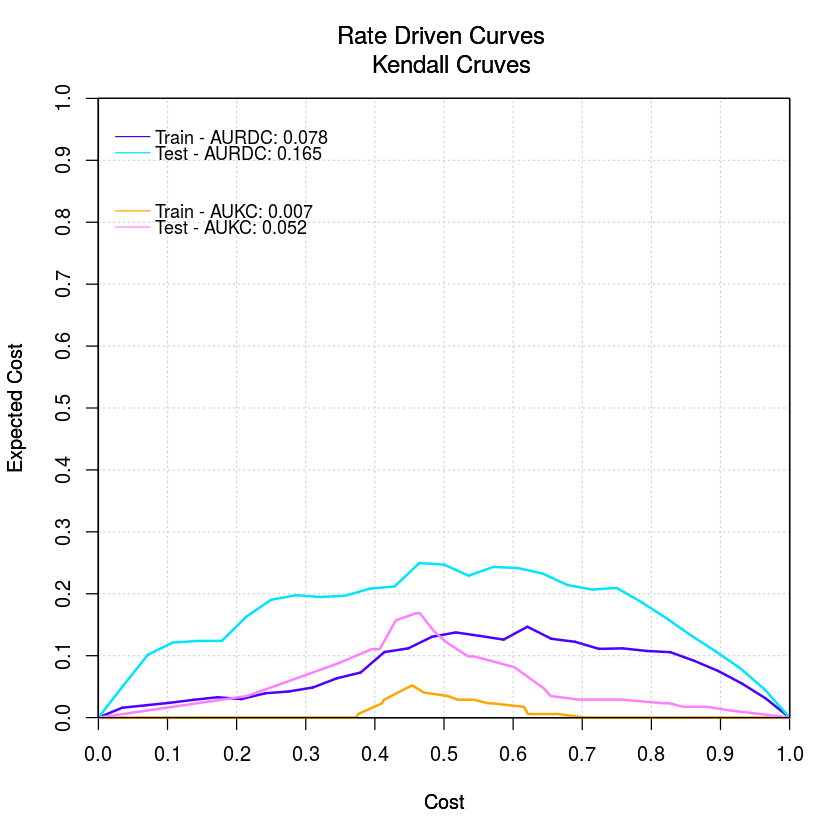

In [42]:
R <- RateDrivenCurves(list(probs_train, probs_test),
list(class_train, class_test),
main = "Rate Driven Curves \n  Kendall Cruves",
xlab = "Cost", ylab = "Expected Cost",
namesClassifiers = c("Train -", "Test -"),
cexL=0.9, xPosLegend = 0, gridOFF = FALSE)
R <- KendallCurves(list(probs_train, probs_test), list(class_train, class_test),
main = NULL, xlab = NULL, ylab = NULL, cexL=0.9,
xPosLegend = 0, yPosLegend = 0.85 ,
gridOFF = FALSE, hold=TRUE,
namesClassifiers = c("Train -", "Test -"))